In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgGray = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
numRows = imgGray.shape[0]
numCols = imgGray.shape[1]

In [4]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [5]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [18]:
def f_getExtentsAffine(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [19]:
def f_transformProjective(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsProjective(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j, 1])
            P = Tinv.dot(P_dash)
            P = P/P[2]
            i , j = P[0] , P[1]
            if i < 0 or i>=numRows or j<0 or j>=numCols:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [20]:
a = 45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
R = np.array([[ca, -sa, 0], [sa, ca, 0], [0, 0, 1]])
T = np.array([[1, 0, -300], [0, 1, -400], [0, 0, 1]])
Sh = np.array([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
S = np.array([[1.3, 0, 0], [0, 0.7, 0], [0, 0, 1]])
A = np.linalg.inv(T).dot(S).dot(R).dot(Sh).dot(T)
H = A
H[2, :] = np.array([0.001, 0.0001, 1])

In [21]:
H

array([[ 9.19238816e-01, -4.59619408e-01,  2.08076118e+02],
       [ 4.94974747e-01,  7.42462120e-01, -4.54772721e+01],
       [ 1.00000000e-03,  1.00000000e-04,  1.00000000e+00]])

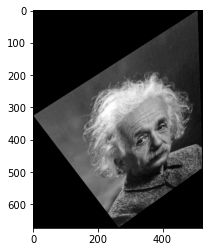

In [22]:
img = f_transformProjective(H, imgGray)
plt.imshow(img, cmap='gray')